Accuracy: 0.89


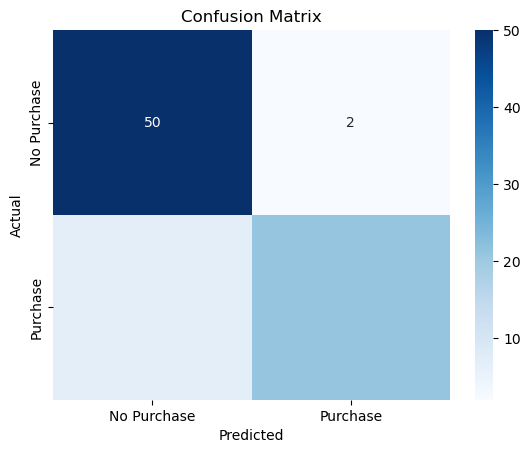

Purchase Prediction: No


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# Load the data
df = pd.read_csv("Social_Network_Ads.csv")
df.drop(columns=["User ID"], inplace=True)
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
# Define features and target
x = df[["Gender", "Age", "EstimatedSalary"]]
y = df["Purchased"]
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Train the model
model = LogisticRegression()
model.fit(x_train, y_train)
# Predict
y_pred = model.predict(x_test)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=["No Purchase",
"Purchase"], yticklabels=["No Purchase", "Purchase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Predict on new data
new_data = np.array([[1, 30, 80000]])
new_data_df = pd.DataFrame(new_data, columns=x.columns)
new_data_scaled = scaler.transform(new_data_df)
prediction = model.predict(new_data_scaled)
if prediction == 1:
    print("Purchase Prediction: Yes")
else:
    print("Purchase Prediction: No")